In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov  4 07:02:45 2024

@author: robberto
"""

from astropy.io import fits
import matplotlib.pyplot as plt

import os
import glob
import numpy as np
import pandas as pd
import copy
import heapq

## """ Instantiate the clas with the correct directory name"""

In [3]:
data_path = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI"
from Class_SAMOS import SAMOS
SAMOS = SAMOS(data_path) 

working on the directory: /Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI


### Check the files you want to process here
https://www.stsci.edu/~robberto/Main/SAMOS/Run_October2024/SAMI/QL_20241017/overview.html

In [5]:
""" DATA ANALYSIS 
=> Night 20241017

ABELL3120 manual Mask T00 Low Red

TARGET = target.025.fits [600s], target.026.fits [600s], target.027.fits [600s]
FLATS  = target.028.fits [2s], calibration.029.fits [2s]
ARC_Ne = calibration.030.fits [10s]
ARC_HgAr = calibration.033.fits [8s]
ARC_HgArNe = calibration.031.fits   [10s], calibration.032.fits [8s]  
ARC_Ne_DMDoff = calibration.034.fits [8s]
ARC_HgAr_DMDoff = calibration.036.fits [8s]
ARC_HgArNe_DMDoff = calibration.035.fits [8s]

=> Night 20241016
BIAS =  bias.055.fits - bias.074.fits 

=> Night 20241016
FLATS_DMDoff = flat019.fits [0.1s]; flat.020.fits[1s]

"""

#CREATE A WORKING DIRECTORY FIRST IF DOES NOT EXIST
working_directory = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS"
os.chdir(working_directory) 
print(working_directory)

data_directory = "/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI"
data_directory_17 = data_directory + "/20241017"
data_directory_16 = data_directory + "/20241016"
data_directory_09 = data_directory + "/20241009"


/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA_ANALYSIS


## READ THE TARGET SPECTRA

In [7]:
#FIRST STEP: READ AND MOVE THE FILES
File_type = "TARGET"
File_NR = '027'
file  = os.path.join(data_directory_17,'target.'+File_NR+'.fits')
print(file)

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI/20241017/target.027.fits


In [8]:
hdu = SAMOS.read_SAMI_mosaic(file)
Target_Spectra = hdu.data
hdu.data = Target_Spectra
hdul = fits.HDUList([hdu]) ; hdul.writeto(File_type+'.fits',overwrite=True)

In [9]:
#correct for cosmic rays
spectra = SAMOS.CR_correct(Target_Spectra)

INFO: Iteration 1: Found 1280 cosmic-ray pixels, Total: 1280 [lacosmic.core]
INFO: Iteration 2: Found 65 cosmic-ray pixels, Total: 1345 [lacosmic.core]
INFO: Iteration 3: Found 8 cosmic-ray pixels, Total: 1353 [lacosmic.core]
INFO: Iteration 4: Found 0 cosmic-ray pixels, Total: 1353 [lacosmic.core]


(1428, 4094)


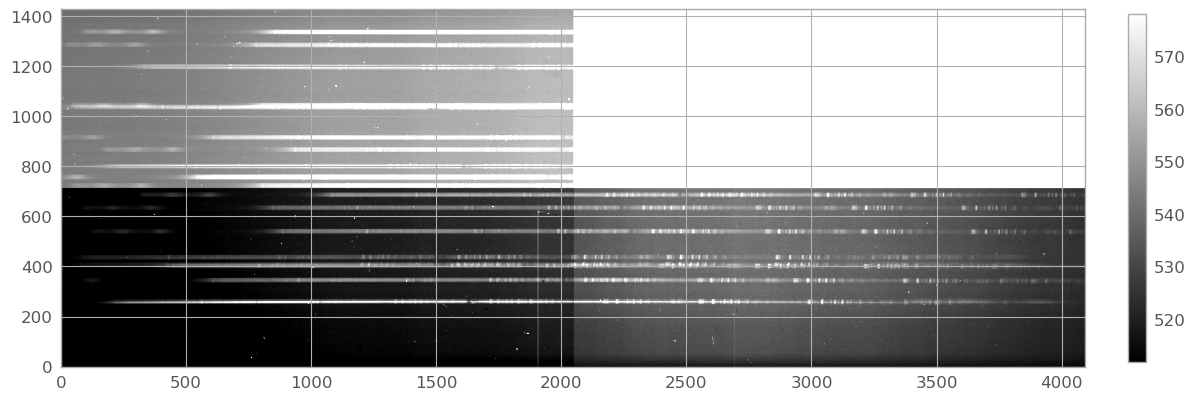

In [10]:
# setting the limits for the gray scale
median = np.median(spectra)
stddev = np.std(spectra)
z0 = median-stddev
z1 = median+stddev
print(spectra.shape)
SAMOS.display_image(spectra,zmin=z0,zmax=z1)

## FLATS AND BIAS


INFO: Iteration 1: Found 3467 cosmic-ray pixels, Total: 3467 [lacosmic.core]
INFO: Iteration 2: Found 219 cosmic-ray pixels, Total: 3686 [lacosmic.core]
INFO: Iteration 3: Found 68 cosmic-ray pixels, Total: 3754 [lacosmic.core]
INFO: Iteration 4: Found 12 cosmic-ray pixels, Total: 3766 [lacosmic.core]


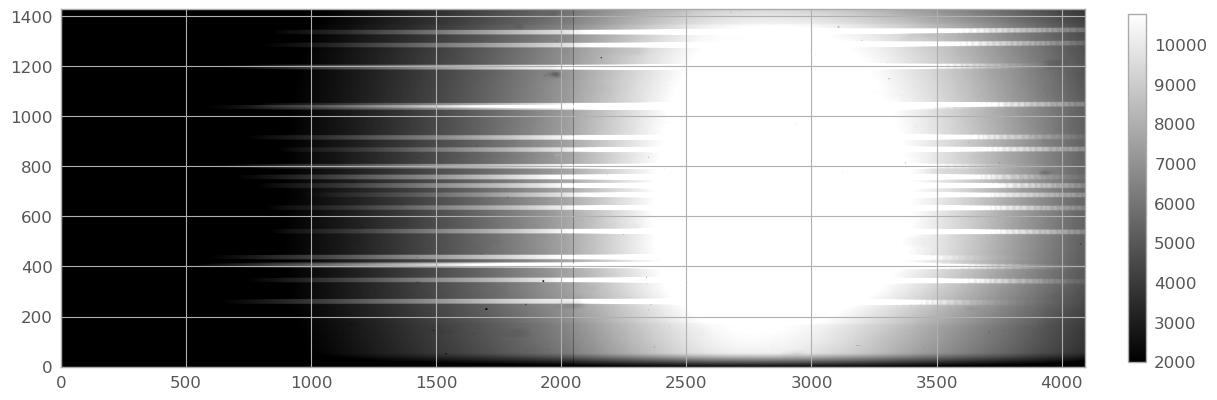

In [12]:
#FIRST STEP: SET THE FILE NAMES
File_type = "FLAT"
File_NR = '028'
file1  = os.path.join(data_directory_17,'target.'+File_NR+'.fits')
File_NR = '029'
file2  = os.path.join(data_directory_17,'calibration.'+File_NR+'.fits')

#SECOND STEP: READ AND AVERAGE
hdu = SAMOS.read_SAMI_mosaic(file1)
flat1_data = hdu.data
hdu.data = flat1_data

hdu1 = SAMOS.read_SAMI_mosaic(file2)
flat2_data = hdu1.data
hdu1.data = flat2_data
flat = ( flat1_data+flat2_data ) / 2

#SAVE
hdul = fits.HDUList([hdu]) ; hdul.writeto(File_type+'.fits',overwrite=True)

#correct for cosmic rays
flat = SAMOS.CR_correct(flat)

#DISPLAY
median = np.median(flat)
stddev = np.std(flat)
z0 = median-stddev
z1 = median+stddev

SAMOS.display_image(flat,zmin=z0,zmax=z1)

## Now the BIAS frames

INFO: Iteration 1: Found 0 cosmic-ray pixels, Total: 0 [lacosmic.core]


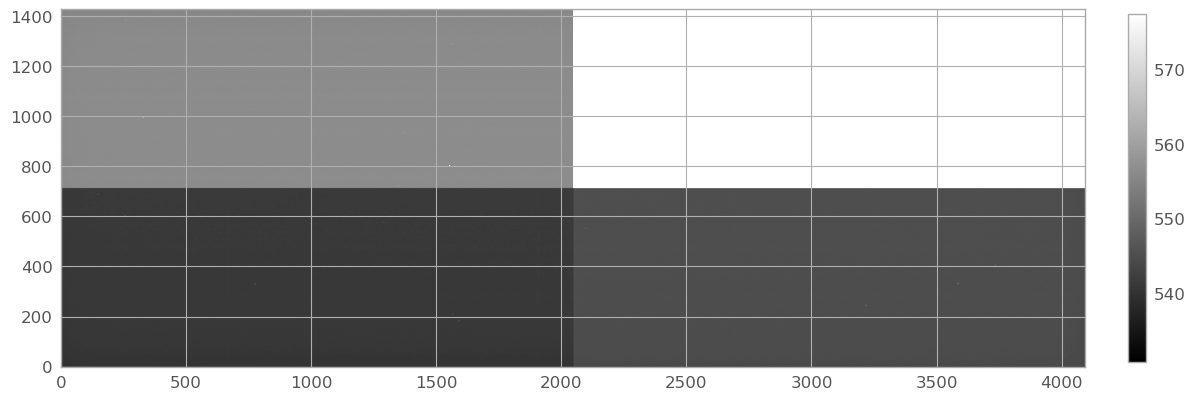

In [14]:
#FIRST STEP: SET THE FILE NAMES
File_type = "BIAS"

File_NR = ['055', '056', '057', '058', '059', '060', '061', '062', '063', '064', '065', '066', '067', '068', '069', '070', '071', '072', '073', '074']
biases = np.zeros( (len(File_NR),1428,4094) )
for i in range(len(File_NR)):
    file = os.path.join(data_directory_16,'bias.'+File_NR[i]+'.fits')
    hdu = SAMOS.read_SAMI_mosaic(file)
    biases[i,:,:] = hdu.data
bias = biases.sum(axis=0)/len(File_NR)
bias.shape

#SAVE
hdul = fits.HDUList([hdu]) ; hdul.writeto(File_type+'.fits',overwrite=True)

#correct for cosmic rays
bias = SAMOS.CR_correct(bias)

#DISPLAY
median = np.median(bias)
stddev = np.std(bias)
z0 = median-stddev
z1 = median+stddev

SAMOS.display_image(bias,zmin=z0,zmax=z1)

## SUBTRACT THE BIAS FROM THE FLAT

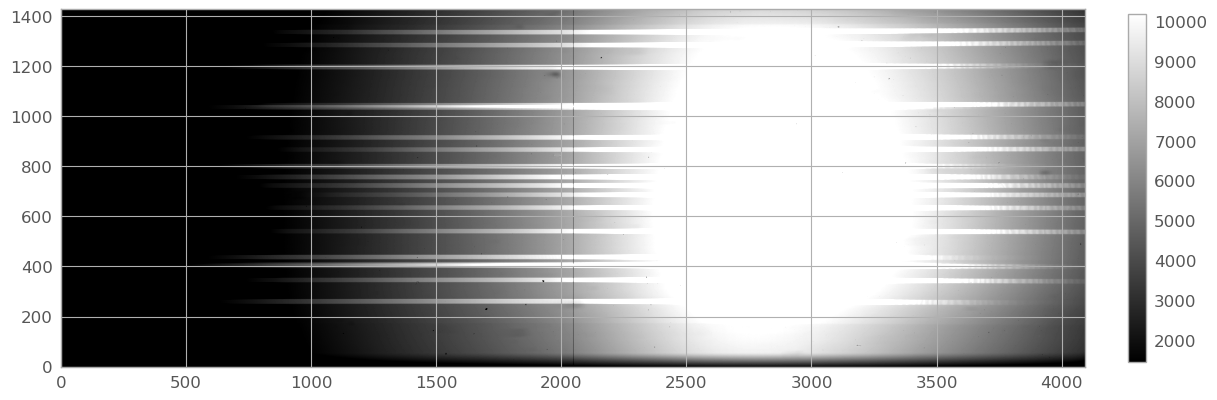

In [16]:
flat_bias = flat - bias

#DISPLAY
median = np.median(flat_bias)
stddev = np.std(flat_bias)
z0 = median-stddev
z1 = median+stddev

SAMOS.display_image(flat_bias,zmin=z0,zmax=z1)

## SUBTRACT THE BIAS FROM THE SPECTRA

-15.913302202423534
-0.4866977975765563


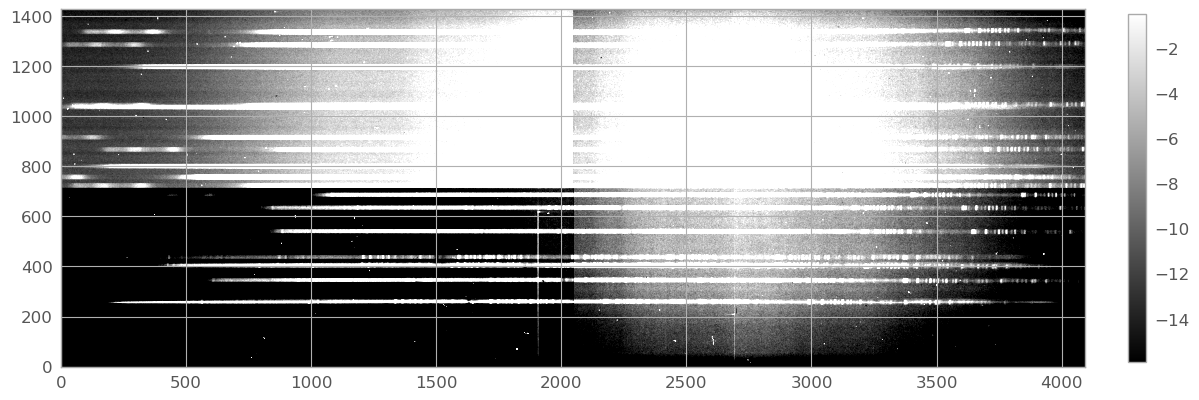

In [762]:
spectra_bias = spectra - bias

#DISPLAY
median = np.median(spectra_bias)
stddev = np.std(spectra_bias)
z0 = median-stddev/2  ; print(z0)
z1 = median+stddev/2  ; print(z1)

SAMOS.display_image(spectra_bias,zmin=z0,zmax=z1)

4094
4094 1428
4.0 0.0 4.0 0.0


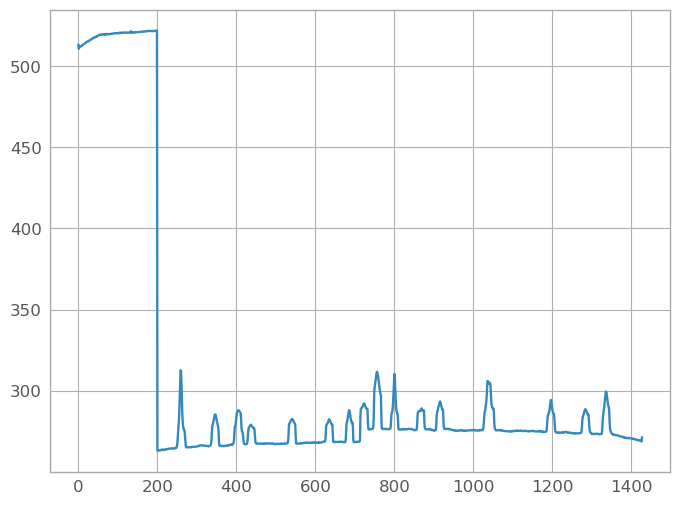

In [19]:
#ignore the bias and c orect the spectra with their own "bias"
dx = spectra.shape[1] ; print(dx)
dy = spectra.shape[0]
print(dx,dy)
dy2=int(dy/2)
dx2=int(dx/2)

spectra_selfbias = copy.deepcopy(spectra)
spectra_selfbias[200:dy2,:dx2] = spectra[200:dy2,:dx2] - np.median(spectra[200:dy2,:dx2]) 
spectra_selfbias[dy2:,dx2:] = spectra[dy2:,dx2:] - np.median(spectra[dy2:,dx2:]) 
spectra_selfbias[200:dy2,:dx2] = spectra[200:dy2,:dx2] - np.median(spectra[200:dy2,:dx2]) 
spectra_selfbias[dy2:,dx2:] = spectra[dy2:,dx2:] - np.median(spectra[dy2:,dx2:])
print(np.median(spectra_selfbias[:dy2,:dx2]), np.median(spectra_selfbias[dy2:,dx2:]), np.median(spectra_selfbias[:dy2,:dx2]), np.median(spectra_selfbias[dy2:,dx2:]))
s_sb = (spectra_selfbias).mean(axis=1)
plt.plot(s_sb)
plt.show()

## ABORT: GO WITH ARC LAMP

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI/20241017/calibration.033.fits
INFO: Iteration 1: Found 36644 cosmic-ray pixels, Total: 36644 [lacosmic.core]
INFO: Iteration 2: Found 7932 cosmic-ray pixels, Total: 44576 [lacosmic.core]
INFO: Iteration 3: Found 2402 cosmic-ray pixels, Total: 46978 [lacosmic.core]
INFO: Iteration 4: Found 1178 cosmic-ray pixels, Total: 48156 [lacosmic.core]


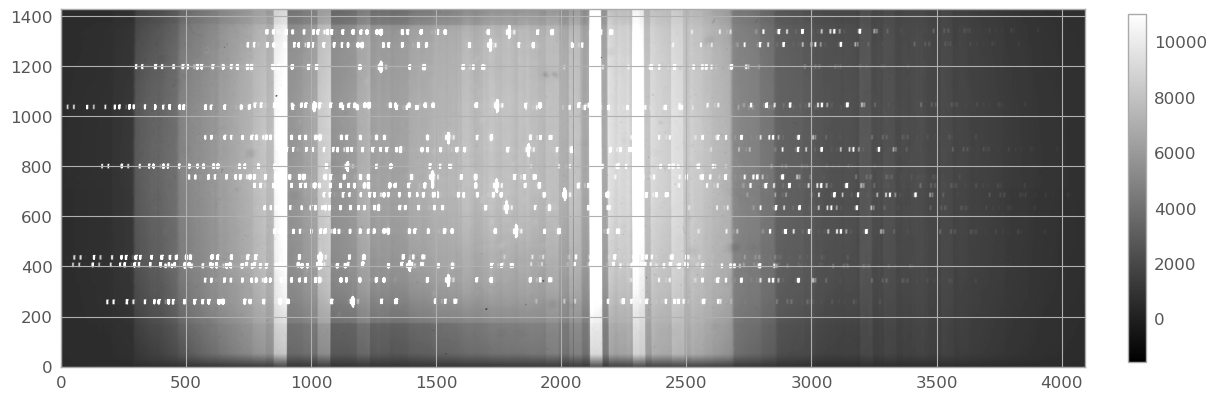

In [21]:
#FIRST STEP: SET THE FILE NAMES
File_type = "ARC"

File_NR = '033'
file  = os.path.join(data_directory_17,'calibration.'+File_NR+'.fits')
print(file)

hdu = SAMOS.read_SAMI_mosaic(file)
arc = hdu.data
#SAVE
hdul = fits.HDUList([hdu]) ; hdul.writeto(File_type+'.fits',overwrite=True)

#correct for cosmic rays
arc = SAMOS.CR_correct(arc)

#DISPLAY
median = np.median(arc)
stddev = np.std(arc)
z0 = median-stddev
z1 = median+stddev

SAMOS.display_image(arc,zmin=z0,zmax=z1)

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI/20241017/calibration.034.fits
INFO: Iteration 1: Found 3079 cosmic-ray pixels, Total: 3079 [lacosmic.core]
INFO: Iteration 2: Found 56 cosmic-ray pixels, Total: 3135 [lacosmic.core]
INFO: Iteration 3: Found 7 cosmic-ray pixels, Total: 3142 [lacosmic.core]
INFO: Iteration 4: Found 2 cosmic-ray pixels, Total: 3144 [lacosmic.core]


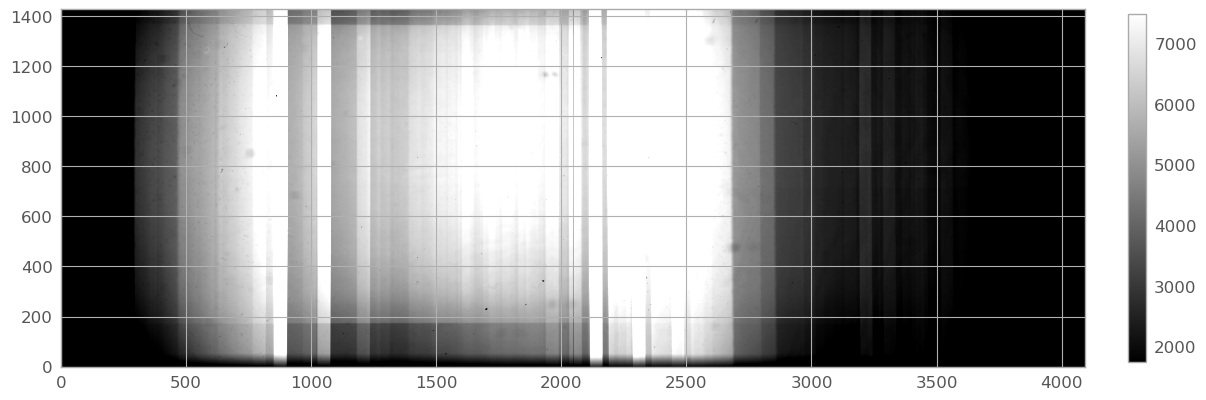

In [22]:
#FIRST STEP: SET THE FILE NAMES
File_type = "ARC_noDMD"

File_NR = '034'
file  = os.path.join(data_directory_17,'calibration.'+File_NR+'.fits')
print(file)

hdu_noDMD = SAMOS.read_SAMI_mosaic(file)
arc_noDMD = hdu_noDMD.data
#SAVE
hdul = fits.HDUList([hdu_noDMD]) ; hdul.writeto(File_type+'.fits',overwrite=True)

#correct for cosmic rays
arc_noDMD = SAMOS.CR_correct(arc_noDMD)

#DISPLAY
median = np.median(arc_noDMD)
stddev = np.std(arc_noDMD)
z0 = median-stddev
z1 = median+stddev

SAMOS.display_image(arc_noDMD,zmin=z0,zmax=z1)

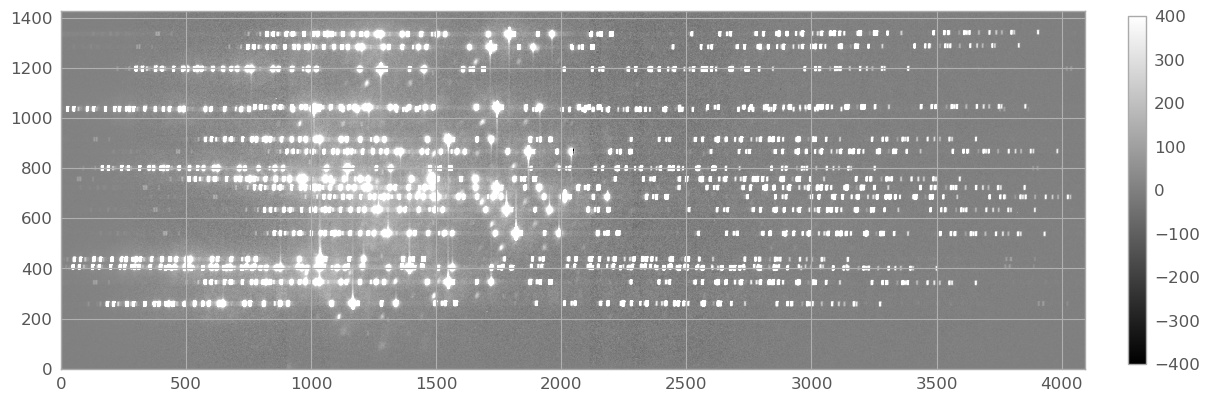

In [23]:
SAMOS.display_image(arc-arc_noDMD,zmin=-400,zmax=400)

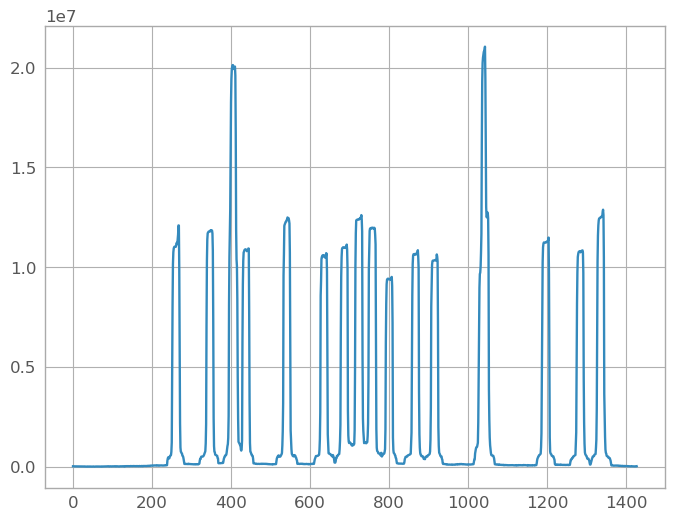

In [24]:
arc_good = arc-arc_noDMD
plt.plot(arc_good.sum(axis=1))

# Looks great. We can use the arc to find the traces!

# Find the traces

4094


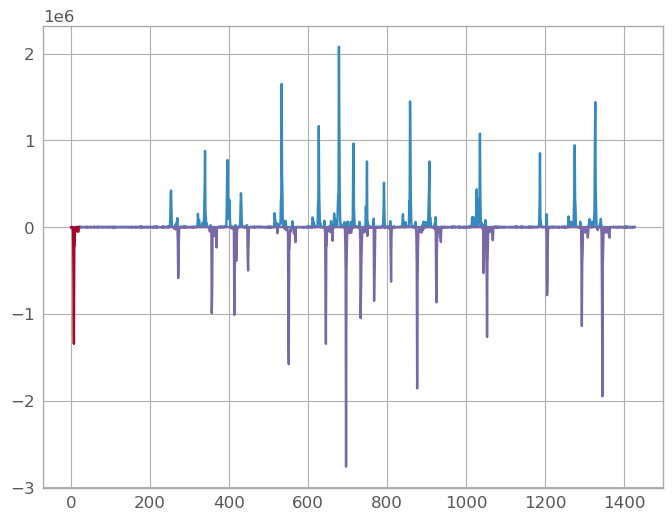

"\nfor i in range(dx): \n#    plt.figure(figsize=(12, 4))\n    #TO FIND THE EDGES WE SCROLL OVER ALL VERTICAL PIXELS\n    row_min = np.min(mask[:,1490+i:1491+i+1], axis=1) ;\n    row_min_p1 = np.roll(row_min,+1)\n    diff = row_min - row_min_p1\n    max_index = np.argmax(diff)\n    min_index = np.argmin(diff)\n    print(max_index, min_index)\n    plt.plot(row_min-row_min_p1,c='black')\n    plt.show()\n    #AND WE FIND THAT THE EDGES AT\n    #  ROWS 79 AND 1273 FOR COLUMN 1490\n    #  ROWS 81 AND 1272 FOR COLUMN 1490+1172  = 2662\n"

In [27]:
dx = arc_good.shape[1] ; print(dx)
dy = arc_good.shape[0]
mask = np.zeros((dy,dx))
cut = arc_good[:,1500:2500].sum(axis=1)
cut1 = np.roll(cut,+1)
diff=cut-cut1
diff_neg = copy.deepcopy(diff)
diff_neg[diff > 0] =0 
diff_pos = copy.deepcopy(diff)
diff_pos[diff < 0] = 0
#match = diff_pos * (-np.roll(diff_neg,-8))
plt.plot(diff_pos)#[620:640])
plt.plot(diff_neg)#[620:640])
plt.plot(np.roll(diff_neg,-18)[620:640])

#match = diff_pos * (-np.roll(diff_neg,-9))
#plt.plot(match[600:700])
#match = diff_pos * (-np.roll(diff_neg,-11))
#plt.plot(match[600:700])
#match = diff_pos * (-np.roll(diff_neg,-10))
#plt.plot(match[600:700])
#match = diff_pos * (-np.roll(diff_neg,-12))
#plt.plot(match[600:700])
#plt.plot(cut)
#plt.plot(cut1)
#plt.plot(match)

plt.show()
"""
for i in range(dx): 
#    plt.figure(figsize=(12, 4))
    #TO FIND THE EDGES WE SCROLL OVER ALL VERTICAL PIXELS
    row_min = np.min(mask[:,1490+i:1491+i+1], axis=1) ;
    row_min_p1 = np.roll(row_min,+1)
    diff = row_min - row_min_p1
    max_index = np.argmax(diff)
    min_index = np.argmin(diff)
    print(max_index, min_index)
    plt.plot(row_min-row_min_p1,c='black')
    plt.show()
    #AND WE FIND THAT THE EDGES AT
    #  ROWS 79 AND 1273 FOR COLUMN 1490
    #  ROWS 81 AND 1272 FOR COLUMN 1490+1172  = 2662
"""


In [739]:
# import library
from findpeaks import findpeaks
# Find some peaks using the smoothing parameter.
fp = findpeaks(lookahead=1, interpolate=3)

results = fp.fit(diff_pos)
# Make plot
#fp.plot()
#print(results['df'],results['df']['y'])
peaks_all=results['df']
all_peaks = results['df'][ (results['df']['peak'] == True)] 
slit_up = all_peaks[all_peaks['y'] > 3E5 ]
v_slit_up=slit_up.to_numpy()
#v_slit_up=np.delete(v_slit_up, 16, axis=0)
print(v_slit_up[:,1], len(v_slit_up[:,1]))
slit_up = v_slit_up[:,1]

results = fp.fit(-diff_neg)
# Make plot
#fp.plot()
#print(results['df'],results['df']['y'])
peaks_all=results['df']
all_peaks = results['df'][ (results['df']['peak'] == True)] 
slit_down = all_peaks[all_peaks['y'] > 3E5 ] 
v_slit_down=slit_down.to_numpy()
print(v_slit_down[:,1], len(v_slit_down[:,1]))
slit_down = v_slit_down[:,1]



[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Interpolating 1d-vector by factor 3
[253 339 396 400 430 533 627 676 678 715 749 792 858 907 1027 1034 1035
 1187 1275 1327] 20
[findpeaks] >Finding peaks in 1d-vector using [peakdetect] method..
[findpeaks] >Interpolating 1d-vector by factor 3
[271 356 413 418 448 551 645 696 697 733 767 810 876 925 1044 1053 1205
 1293 1345] 19


# ... there is clearly a problem with the pairing of the edges
one extra positive peak, the 1035 at i=16. Remove it...

[253 339 396 400 430 533 627 676 678 715 749 792 858 907 1027 1034 1187
 1275 1327] 19
[271 356 413 418 448 551 645 696 697 733 767 810 876 925 1044 1053 1205
 1293 1345] 19


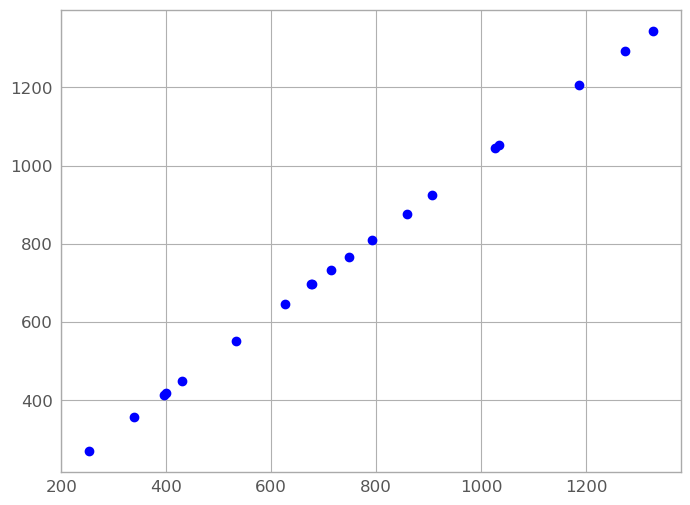

In [742]:
v_slit_up=np.delete(v_slit_up, 16, axis=0)
print(v_slit_up[:,1], len(v_slit_up[:,1]))
slit_up = v_slit_up[:,1]
print(v_slit_down[:,1], len(v_slit_down[:,1]))
slit_down = v_slit_down[:,1]
plt.scatter(v_slit_up[:,1],v_slit_down[:,1],c='blue')

We see there are still problems at entires 2,3, then 7,8, and 14,15

[253 339 430 533 627 715 749 792 858 907 1187 1275 1327] 13
[271 356 448 551 645 733 767 810 876 925 1205 1293 1345] 13


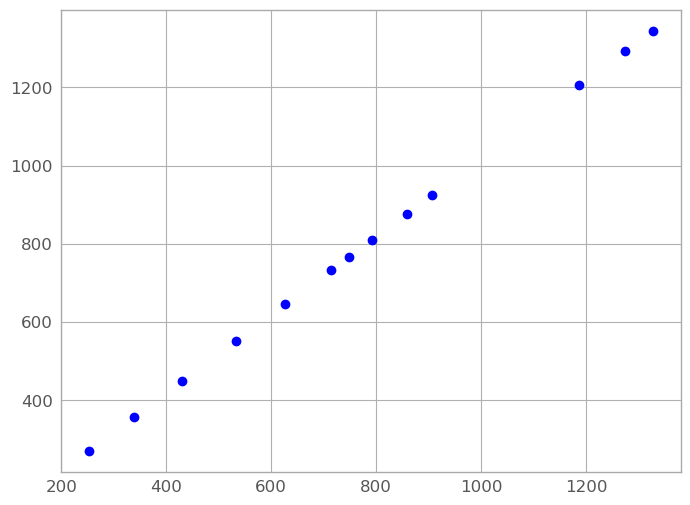

In [745]:
v_slit_up=np.delete(v_slit_up, [2,3,7,8,14,15], axis=0)
v_slit_down=np.delete(v_slit_down, [2,3,7,8,14,15], axis=0)
print(v_slit_up[:,1], len(v_slit_up[:,1]))
slit_up = v_slit_up[:,1]
print(v_slit_down[:,1], len(v_slit_down[:,1]))
slit_down = v_slit_down[:,1]
plt.scatter(v_slit_up[:,1],v_slit_down[:,1],c='blue')

Good. We can now define the slits

In [748]:
slits=[]
for i in range(len(slit_up)):
    slits.append([slit_up[i],slit_down[i]])
print("we have ",len(slits), "slits")
print("that we can call using e.g. slits[5]:",slit[5])


we have  13 slits
that we can call using e.g. slits[5]: [533, 551]


We can do better, setting the limits of the slit edges:
and create a slits

In [751]:
slits=[]
for i in range(len(slit_up)):
    #print([slit_up[i],slit_down[i]])
    if i ==0:
        s0 = slit_up[i]-10
    else:    
        s0 = np.max([slit_down[i-1],slit_up[i]-10])
    if  i == len(slit_down)-1:
        s1 = slit_down[i]+10
    else:
        s1 = np.min([slit_up[i+1],slit_down[i]+10])
#    print([s0,slit_up[i],slit_down[i],s1])   
    slits.append([s0,slit_up[i],slit_down[i],s1]) 

print("So the slit[0] is:",slits[2])

So the slit[0] is: [420, 430, 448, 458]


## so basically we have found the traces

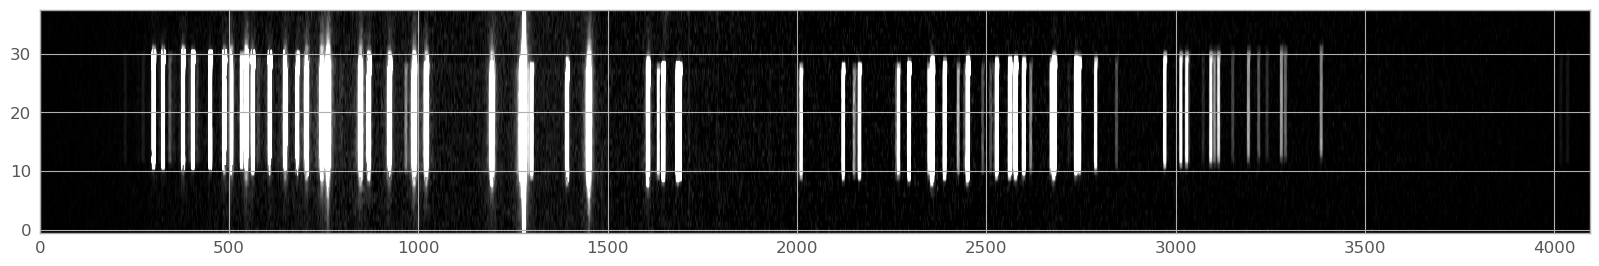

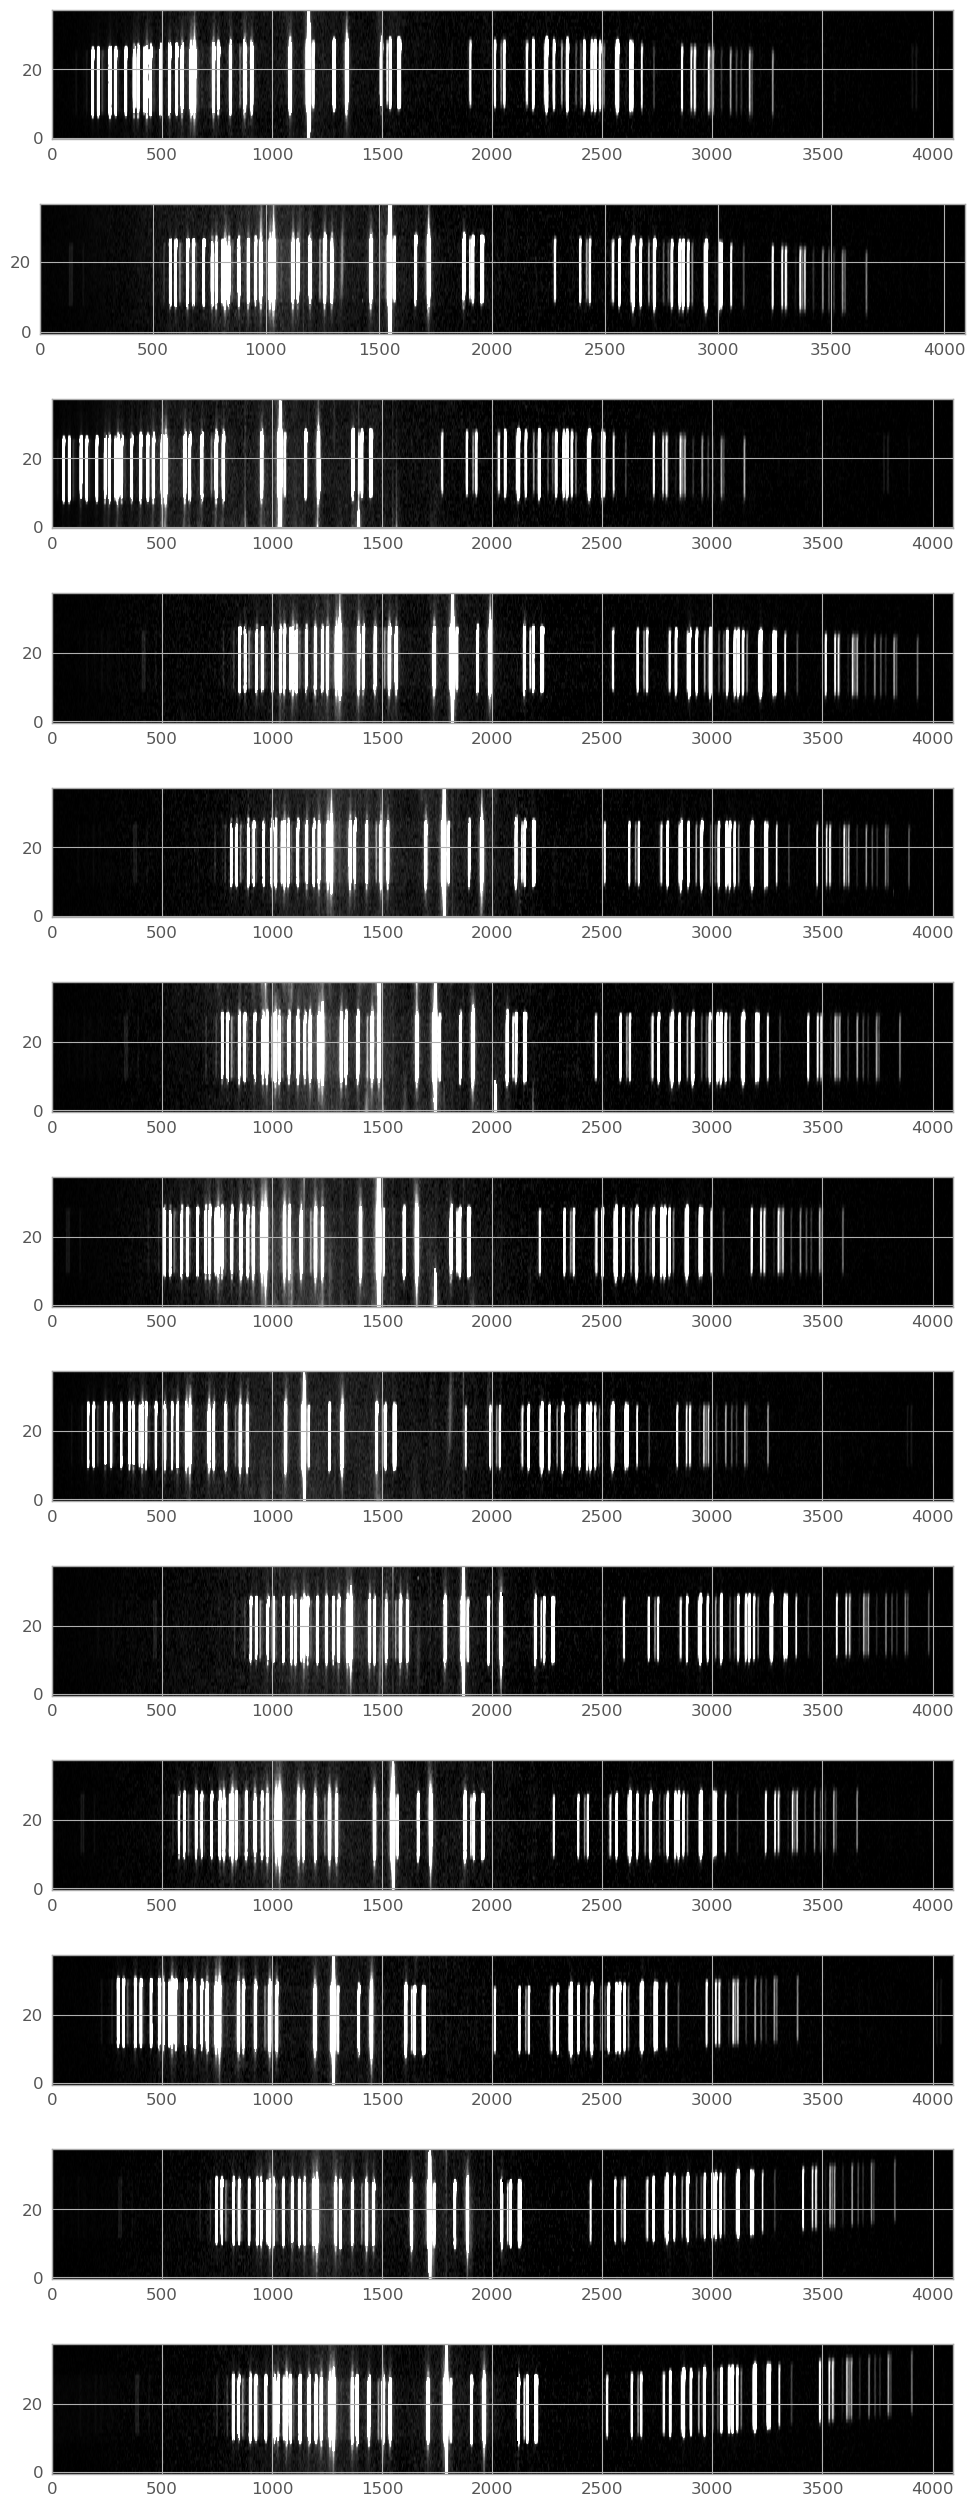

In [754]:
i_slit=10
arc_good = arc-arc_noDMD
#plt.imshow(image, origin='lower', cmap='gray',vmin=zmin, vmax=zmax)

plt.figure(figsize=(20,3))
plt.imshow(arc_good[slits[i_slit][0]:slits[i_slit][3],:], origin='lower', cmap='gray',vmin=0, vmax=1000,aspect='15.5')
#plt.gca().set_aspect(0.5)
plt.show()

f, axarr = plt.subplots(len(slits),figsize=(20, 32))
#axarr.figure(figsize=(20,30))
for i_slit in range(len(slits)):
    axarr[i_slit].imshow(arc_good[slits[i_slit][0]:slits[i_slit][3],:], origin='lower', cmap='gray',vmin=0, vmax=1000,aspect='15.5')
plt.show()

In [ ]:
#Repeat with the flats

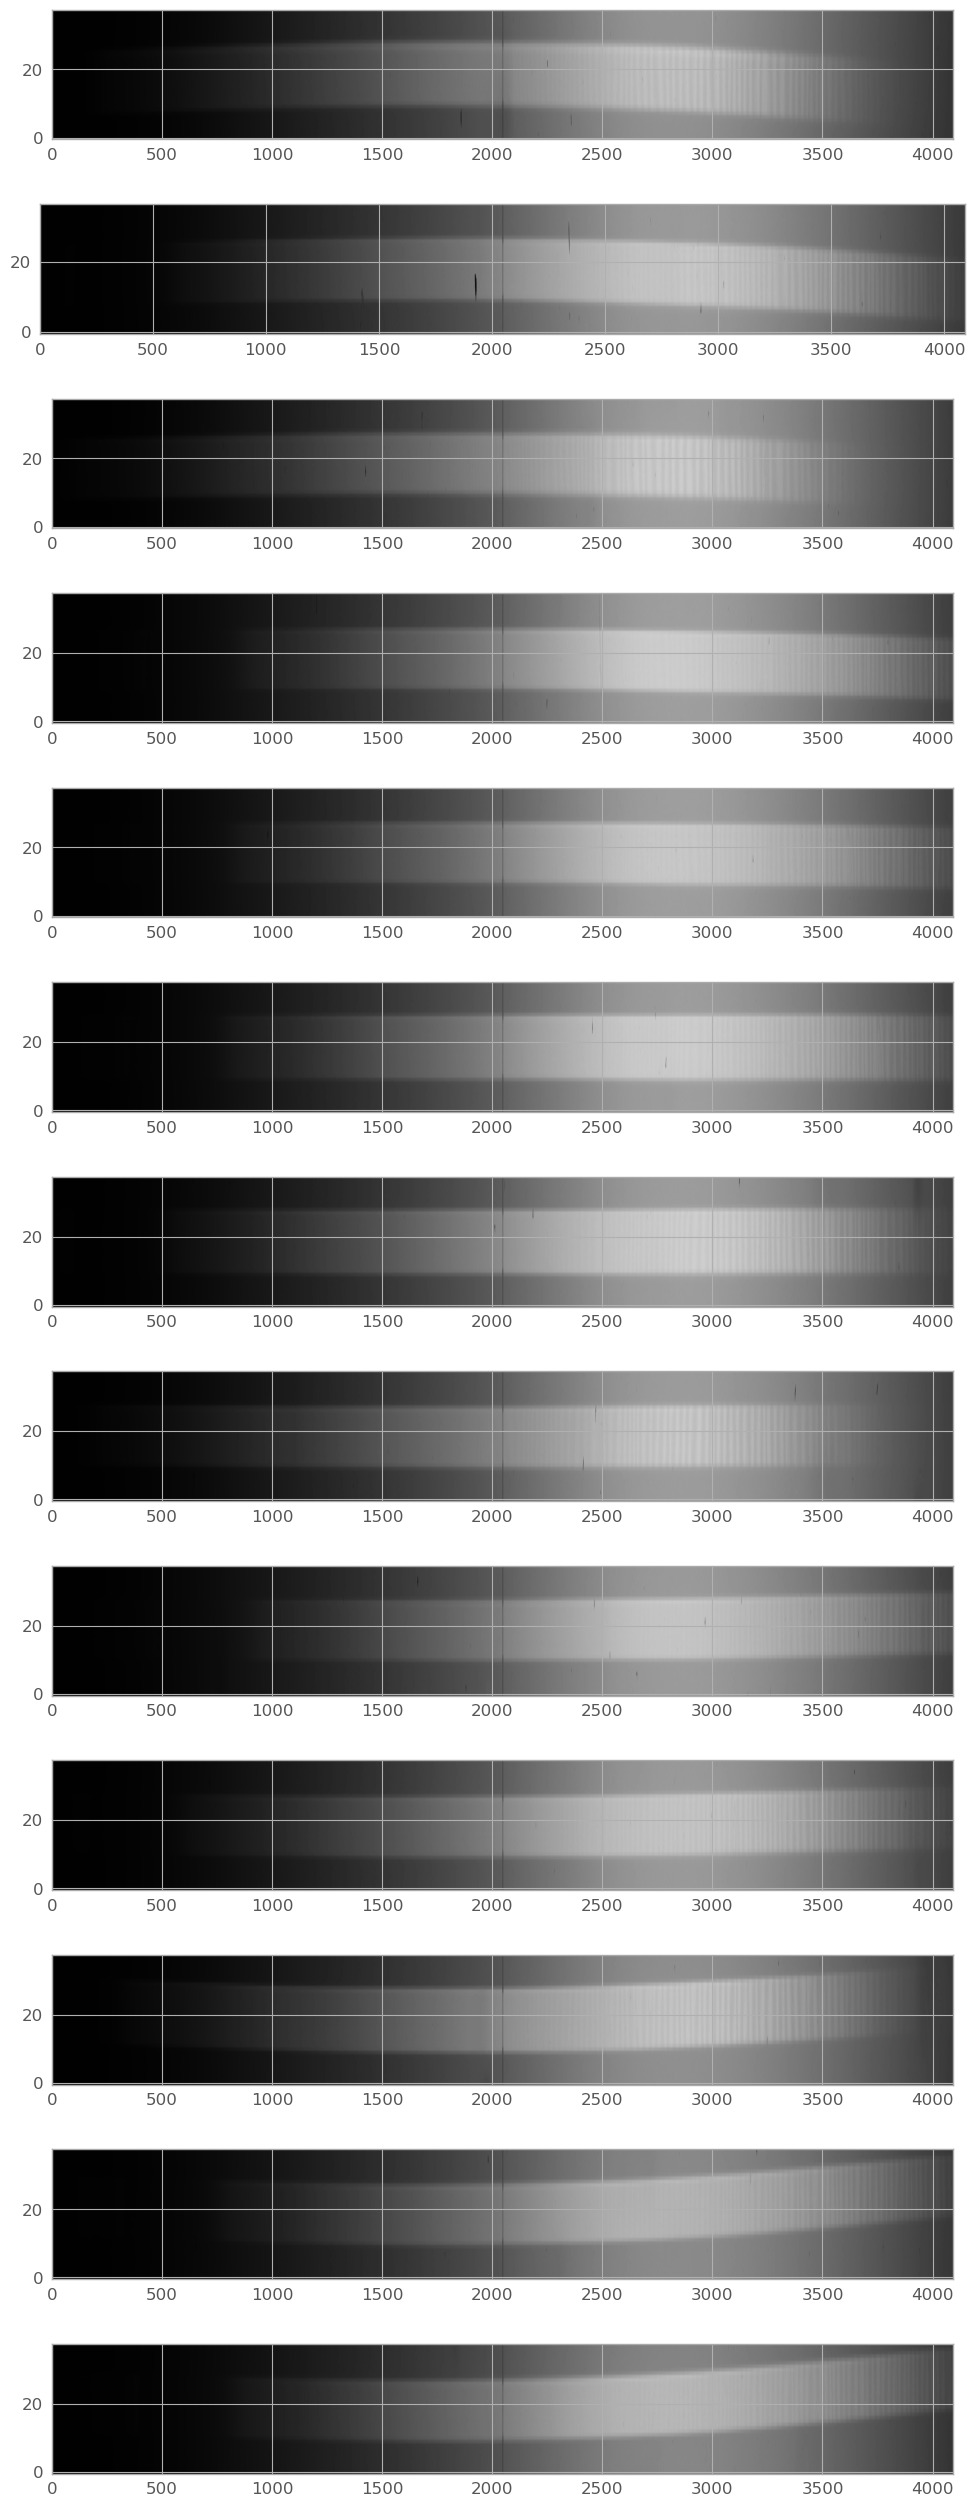

In [784]:
i_slit=10
#plt.imshow(image, origin='lower', cmap='gray',vmin=zmin, vmax=zmax)

#plt.figure(figsize=(20,3))
#plt.imshow(flat_bias[slits[i_slit][0]:slits[i_slit][3],:], origin='lower', cmap='gray',vmin=0, vmax=20000,aspect='15.5')
#plt.gca().set_aspect(0.5)
#plt.show()

f, axarr = plt.subplots(len(slits),figsize=(20, 32))
#axarr.figure(figsize=(20,30))
for i_slit in range(len(slits)):
    axarr[i_slit].imshow(flat_bias[slits[i_slit][0]:slits[i_slit][3],:], origin='lower', cmap='gray',vmin=-100, vmax=20000,aspect='15.5')
plt.show()

In [ ]:
import cv2
# Blur the image for better edge detection
flat_bias_blur = cv2.GaussianBlur(flat_bias,(3,3), sigmaX=0, sigmaY=0) 

sobelx = cv2.Sobel(src=flat_bias_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=flat_bias_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=flat_bias_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
 
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)
 
cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
 
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

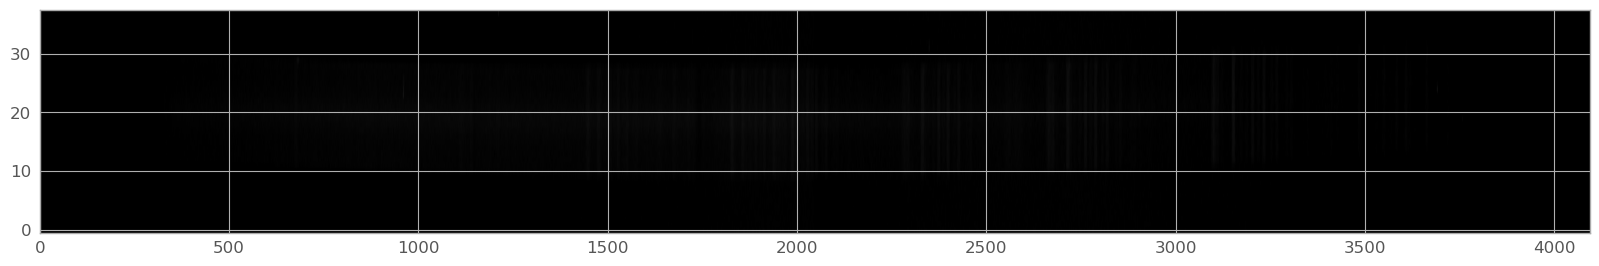

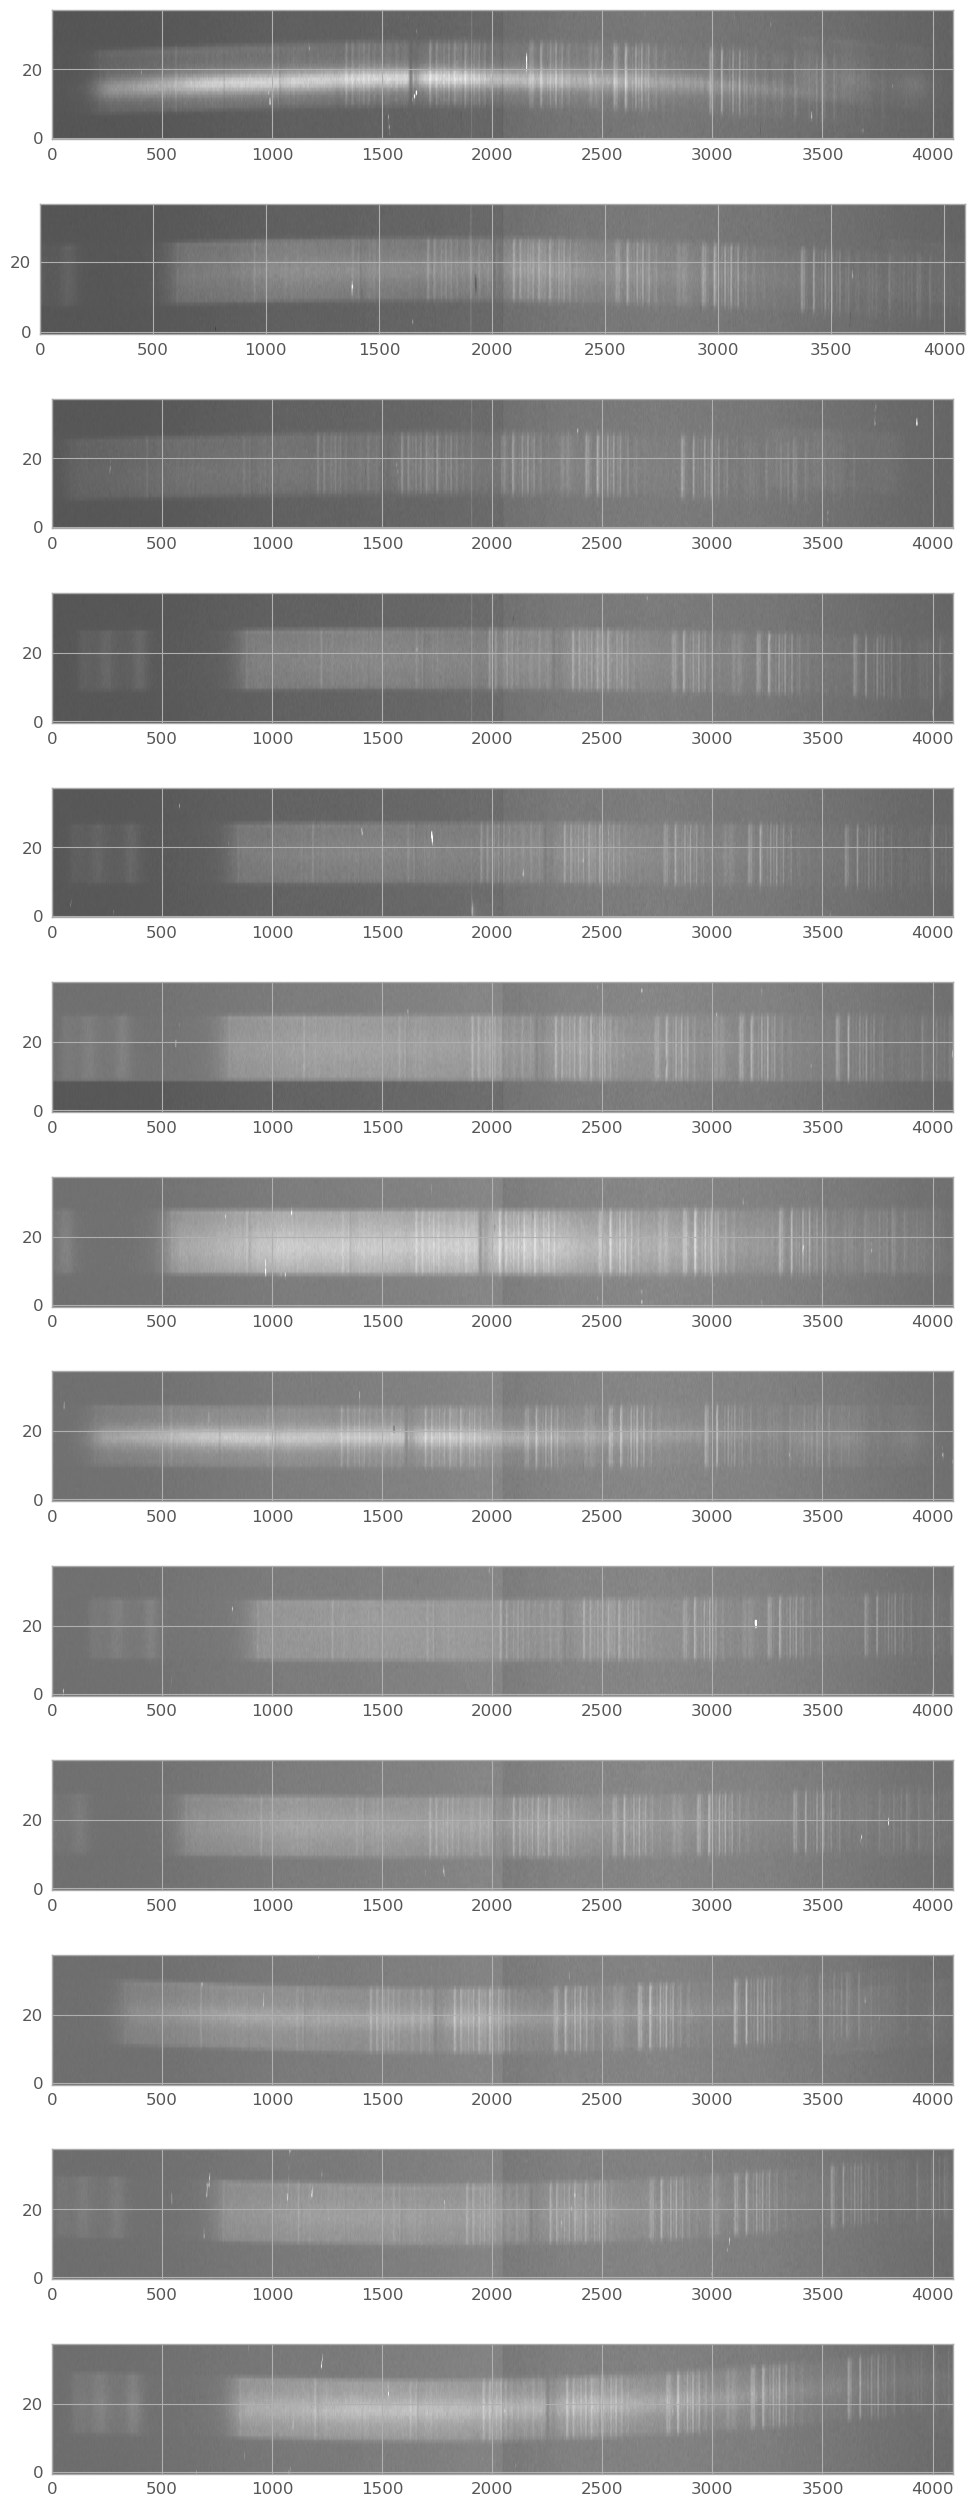

In [768]:
i_slit=10
#plt.imshow(image, origin='lower', cmap='gray',vmin=zmin, vmax=zmax)

plt.figure(figsize=(20,3))
plt.imshow(spectra_bias[slits[i_slit][0]:slits[i_slit][3],:], origin='lower', cmap='gray',vmin=0, vmax=1000,aspect='15.5')
#plt.gca().set_aspect(0.5)
plt.show()

f, axarr = plt.subplots(len(slits),figsize=(20, 32))
#axarr.figure(figsize=(20,30))
for i_slit in range(len(slits)):
    axarr[i_slit].imshow(spectra_bias[slits[i_slit][0]:slits[i_slit][3],:], origin='lower', cmap='gray',vmin=-100, vmax=100,aspect='15.5')
plt.show()

## Check the tilt of the spectra

In [384]:
ima = slits[i_slit][1]#:i_slit[0][1],1000:1100]
plt.imshow(image, origin='lower', cmap='gray',vmin=zmin, vmax=zmax)
display_imageslits[i_slit][1]#:i_slit[0][1],1000:1100]

253

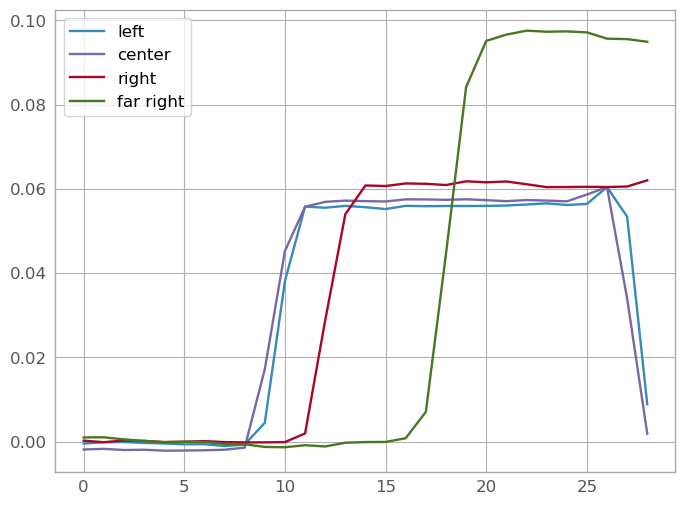

In [444]:
i_slit = 18

cut_left= flat_bias[slits[i_slit][0]:slits[i_slit][3],1000:1100].mean(axis=1) - flat_bias[slits[i_slit][0]:slits[i_slit][1],1000:1100].mean()
plt.plot(cut_left/np.sum(cut_left), label='left')

cut_center = flat_bias[slits[i_slit][0]:slits[i_slit][3],2000:2100].mean(axis=1) - flat_bias[slits[i_slit][0]:slits[i_slit][1],2000:2100].mean()
plt.plot(cut_center/np.sum(cut_center),label='center')

cut_right= flat_bias[slits[i_slit][0]:slits[i_slit][3],3000:3100].mean(axis=1) - flat_bias[slits[i_slit][0]:slits[i_slit][1],3000:3100].mean()
plt.plot(cut_right/np.sum(cut_right),label='right')

cut_farright= flat_bias[slits[i_slit][0]:slits[i_slit][3],4000:4100].mean(axis=1) - flat_bias[slits[i_slit][0]:slits[i_slit][1],4000:4100].mean()
plt.plot(cut_farright/np.sum(cut_farright),label='far right')
plt.legend()
plt.show()

#YES THERE IS A TILT...

# Extract the traces

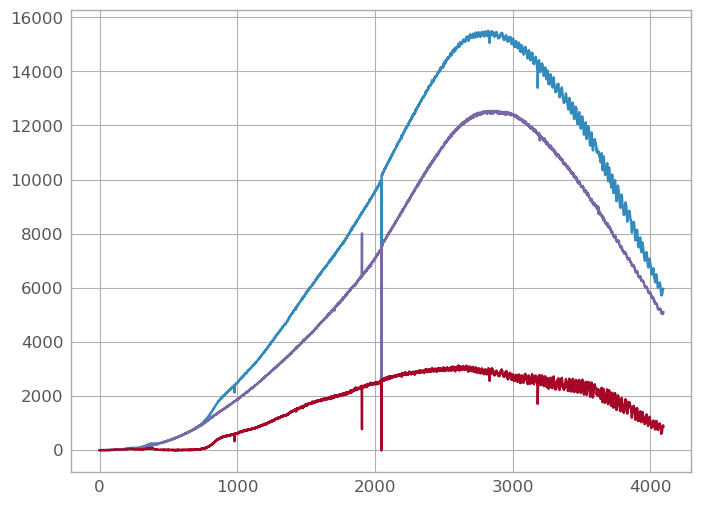

In [147]:
flat_trace1 = flat_bias[627:645,:].mean(axis=0)
plt.plot(flat_trace1)
bck_trace1 = flat_bias[617:627,:].mean(axis=0)
plt.plot(bck_trace1)
plt.plot(flat_trace1-bck_trace1)
ff_trace1 = (flat_trace1-bck_trace1) / np.mean(flat_trace1-bck_trace1)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

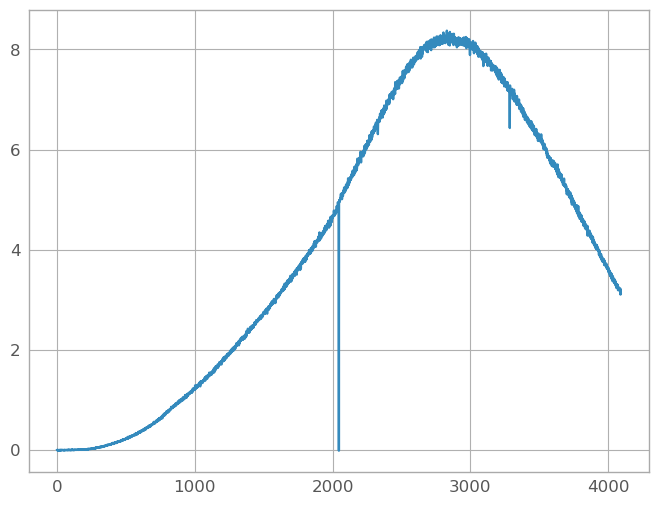

In [124]:
plt.plot(flat_bias[518,:]/1500)
#plt.plot(spectra_bias[518,:]+10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

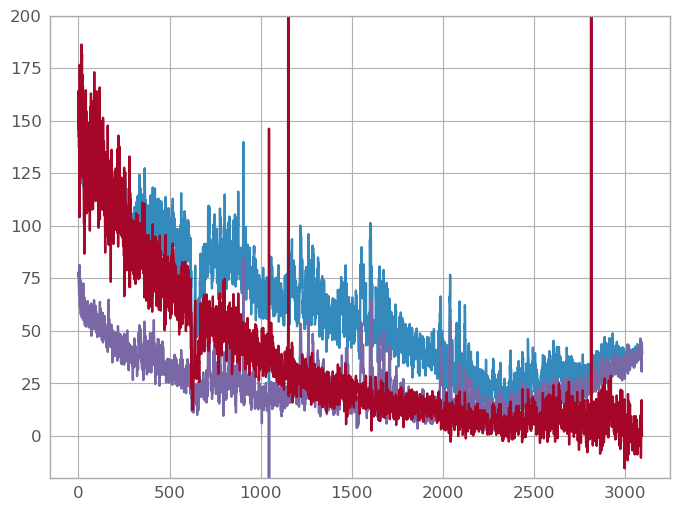

In [97]:
row = 259
ff = flat_bias[row,:]/np.mean(flat_bias[row,:])
#plt.plot(ff)#flat_bias[row,:])

row1 = 268
sky = flat_bias[row1,:]/np.mean(flat_bias[row1,:])
#plt.plot(sky)#flat_bias[row,:])
#plt.plot(ff-sky)#flat_bias[row,:])
plt.ylim([-20,200])
plt.plot((spectra_bias[row,1000:])-min(spectra_bias[row,1000:])/ff[1000:])
plt.plot((spectra_bias[row1,1000:])-min(spectra_bias[row1,1000:])/ff[1000:])
diff = spectra_bias[row,1000:]-spectra_bias[row1,1000:]
plt.plot(diff/ff[1000:])

plt.show

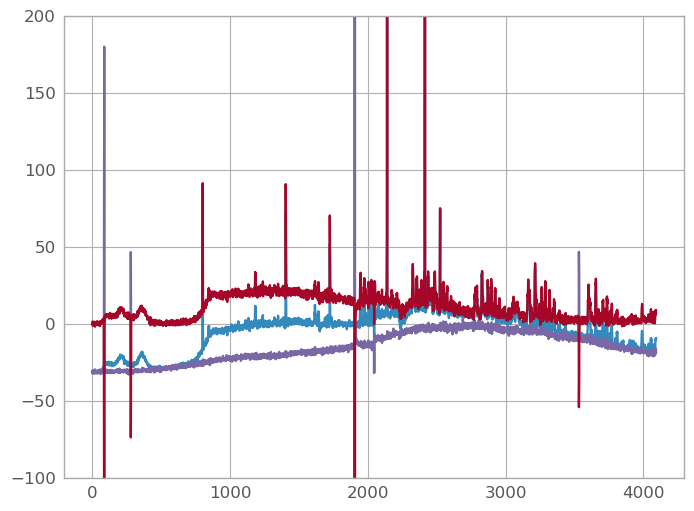

In [149]:
target_trace1 = spectra_bias[627:645,:].mean(axis=0)
plt.plot(target_trace1)
lamp_trace1 = spectra_bias[617:627,:].mean(axis=0)
plt.plot(lamp_trace1)
plt.plot(target_trace1-lamp_trace1)
spec_trace1  = target_trace1-lamp_trace1
plt.ylim([-100,200])
plt.show()

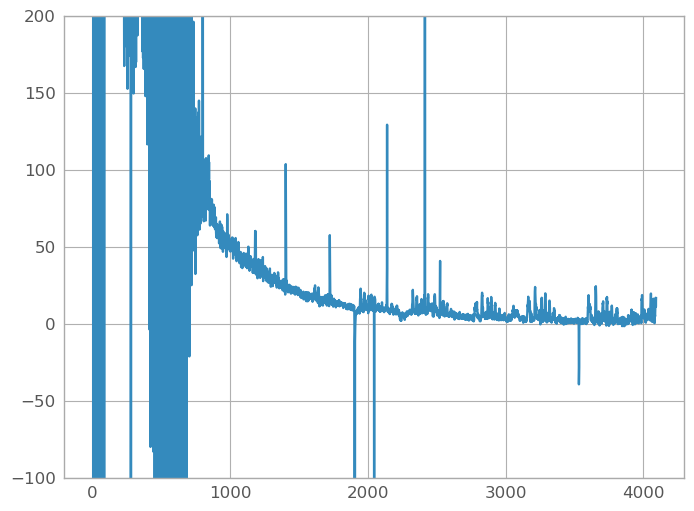

In [151]:
plt.plot(spec_trace1/ff_trace1)
plt.ylim([-100,200])
plt.show()

## CHECK: BUILDING THE P-FLATS

Pixel flats are obtained when two flats of different brightness (e.g. exposure time) are bias subtracted and then divided; 
after division by the ration of the exposure times, the image should be around 1 average, with salt-pepper noise indicative of the relative response of the pixels. To be repeated multiple times to beat down the readnoise.

We run thi experiment on the first night, and the format of the image was later changed so these are not useful for processing data taken later.

/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI/20241009/flat.019.fits
/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI/20241009/flat.020.fits
/Users/robberto/Library/CloudStorage/Box-Box/My Documents - Massimo Robberto/@Massimo/_Science/2. Projects_HW/SAMOS/SAMOS_DATA/RUN2/SAMI/20241009/flat.041.fits
(1284, 4094)


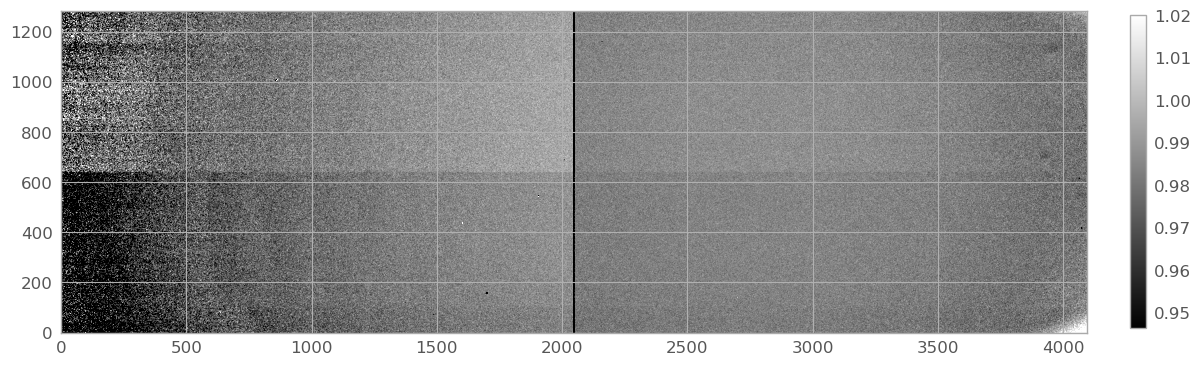

In [23]:
#FIRST STEP: READ AND MOVE THE FILES
File_type = "FLAT QUARTZ"
File_NR = '019'
file_01  = os.path.join(data_directory_09,'flat.'+File_NR+'.fits')
print(file_01)

File_NR = '020'
file_10  = os.path.join(data_directory_09,'flat.'+File_NR+'.fits')
print(file_10)

File_type = "FLAT QUARTZ"
File_NR = '041'
file_bias  = os.path.join(data_directory_09,'flat.'+File_NR+'.fits')
print(file_bias)


#SECOND STEP: READ AND AVERAGE
hdu = SAMOS.read_SAMI_mosaic(file_01)
flat_01_data = hdu.data
hdu.data = flat_01_data

hdu1 = SAMOS.read_SAMI_mosaic(file_10)
flat_10_data = hdu1.data
hdu1.data = flat_10_data

hdu1 = SAMOS.read_SAMI_mosaic(file_bias)
bias_data = hdu1.data
hdu1.data = bias_data

flat_01_data_bias = flat_01_data - bias_data
flat_10_data_bias = flat_10_data - bias_data
flat = np.divide(flat_10_data_bias,flat_01_data_bias,out=np.full_like(flat_10_data_bias, 10), where=flat_01_data_bias!=0 )/10.
print(flat.shape)

#DISPLAY
image = flat
median = np.median(flat)
stddev = np.std(flat)
z0 = median-stddev
z1 = median+stddev

SAMOS.display_image(flat,zmin=z0,zmax=z1)

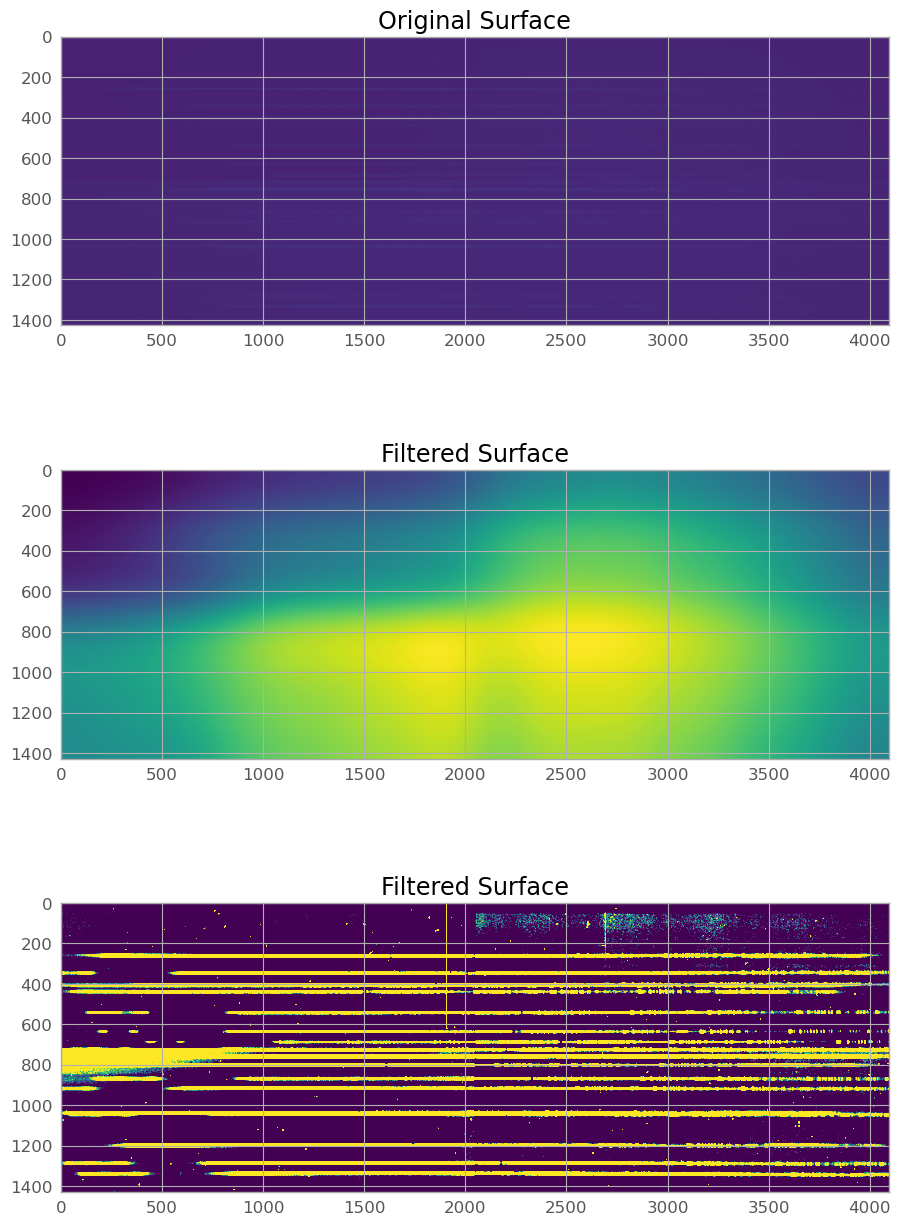

In [758]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt


# Apply the Gaussian filter
Z = spectra_bias
filtered_Z = gaussian_filter(Z, sigma=125)

# Plot the original and filtered surfaces
fig, ax = plt.subplots(3, 1, figsize=(30, 15))
ax[0].imshow(Z, cmap='viridis')
ax[0].set_title('Original Surface')
ax[1].imshow(filtered_Z, cmap='viridis')
ax[1].set_title('Filtered Surface')
ax[2].imshow(Z-filtered_Z, cmap='viridis',vmin=0, vmax=2)
ax[2].set_title('Filtered Surface')

plt.show()

4094 1284
(642, 4094)
525.0 576.0 542.0 580.0
542.45 556.8 554.05 597.8


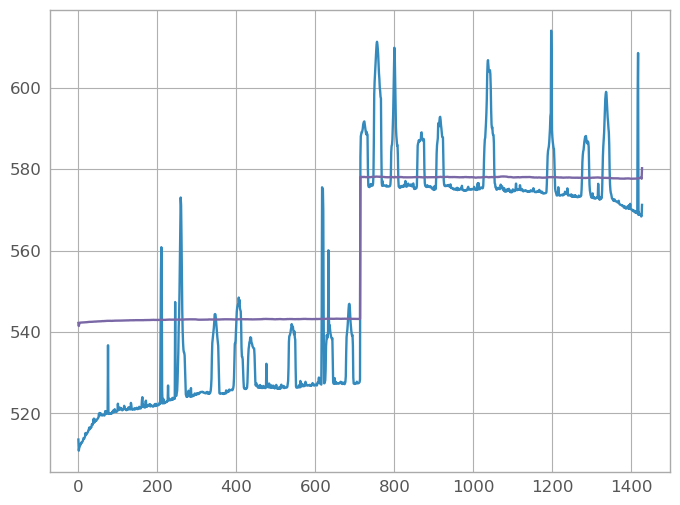

-27.766470779811698 22.233529220188302 4.233529220188302 11.61856286237014


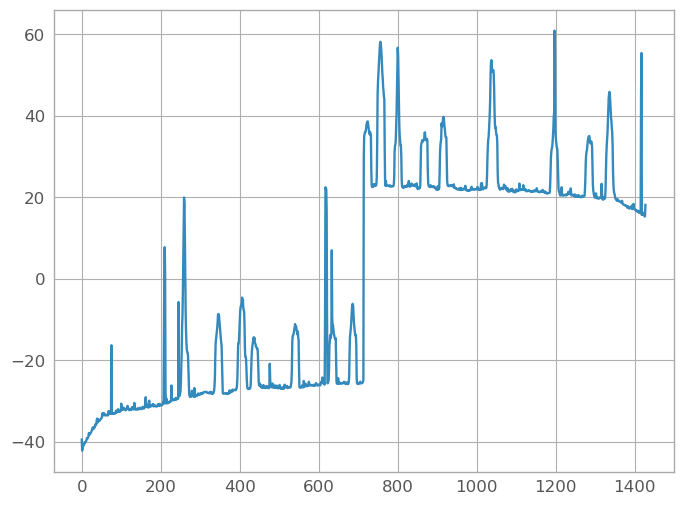

In [330]:
print(dx,dy)
dy2=int(dy/2)
dx2=int(dx/2)
#s = #(spectra).mean(axis=1)
#b = (bias).mean(axis=1)
print(spectra[0:dy2,:].shape)
print(np.median(spectra[:dy2,:]), np.median(spectra[dy2:,:]), np.median(spectra[:,:dx2]), np.median(spectra[:,dx2:]))
print(np.median(bias[:dy2,:]), np.median(bias[dy2:,:]), np.median(bias[:,:dx2]), np.median(bias[:,dx2:]))
plt.plot( (spectra).mean(axis=1))
plt.plot( (bias).mean(axis=1))
plt.show()

#there is a problem with the bias...

#ignore it and c orrect the spectra with their own "bias"
spectra_selfbias = copy.deepcopy(spectra)
spectra_selfbias[:dy2,:] = spectra[:dy2,:] - np.median(spectra[:dy2,:]) 
spectra_selfbias[dy2:,:] = spectra[dy2:,:] - np.median(spectra[dy2:,:]) 
spectra_selfbias[:,:dx2] = spectra[:,:dx2] - np.median(spectra[:,:dx2]) 
spectra_selfbias[:,dx2:] = spectra[:,dx2:] - np.median(spectra[:,dx2:])
print(np.median(spectra_selfbias[:dy2,:]), np.median(spectra_selfbias[dy2:,:]), np.median(spectra_selfbias[:,:dx2]), np.median(spectra_selfbias[:,dx2:]))
s_sb = (spectra_selfbias).mean(axis=1)
plt.plot(s_sb)
plt.show()